# Project: The Movie Database Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 


### Question(s) for Analysis
> 1. What year has the most amount of occurrences?
> 2. What genres of movie has the longest runtime?
> 3. What director has the most movies in a 10year range?
> 4. Which directors have had the most profitable movies?






In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [5]:
# Load your data. Perform operations to inspect data
df = pd.read_csv(r'C:\Users\hp\Documents\ALX Files\First Project\tmdb_movies.csv')

In [57]:
# print out a few lines
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Data Cleaning

In [11]:
df.shape

(10866, 21)

There are 10866 rows

There are 21 columns

In [54]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are a null values in 'imdb_id', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies'

We will thereby drop some columns because we wil not be using them in the Exploratory data analysis and also ignore some null values as they may not be influential to our analysis according to our research questions.

In [75]:
df = df.drop(columns = ['imdb_id','homepage','tagline','budget_adj','revenue_adj','cast'])

verify the columns available by checking the datatypes

In [21]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

After going through the datatypes, all looks good. But I think I need to change the 'release_date' from string to a date datatype.

In [40]:
# changing datatype of the release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [41]:
# Verify data type change for release_year
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
director                        object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [321]:
### check the amount of years availale in the dataset
print(df.release_year.unique())
print(df.release_year.nunique(),"years")

[2015 2014 1977 2009 2010 1999 2001 2008 2011 2002 1994 2012 2003 1997
 2013 1985 2005 2006 2004 1972 1980 2007 1979 1984 1983 1995 1992 1981
 1996 2000 1982 1998 1989 1991 1988 1987 1968 1974 1975 1962 1964 1971
 1990 1961 1960 1976 1993 1967 1963 1986 1973 1970 1965 1969 1978 1966]
56 years


<a id='eda'></a>
## Exploratory Data Analysis




### What year has the most amount of occurrences?

In this research question, we want to examine the year that has the most occurrences in the dataset, which undoubtedly means that more movies were release in this year more than any other year.

In [50]:
# validating the column for null values
df.isnull().sum().release_year

0

In [51]:
# validating the column's datatype
df.release_year.dtype

dtype('int64')

In [52]:
# checking for the top 5 years with the most occurrences
df['release_year'].value_counts()[:5]

2014    700
2013    659
2015    629
2012    588
2011    540
Name: release_year, dtype: int64

In [48]:
## creating a function to avoid repetitive code
def top_years():
   return df['release_year'].value_counts()[:5]

calling the function and also displaying horizontal bar chart to visually present the years with the most occurrences in this dataset

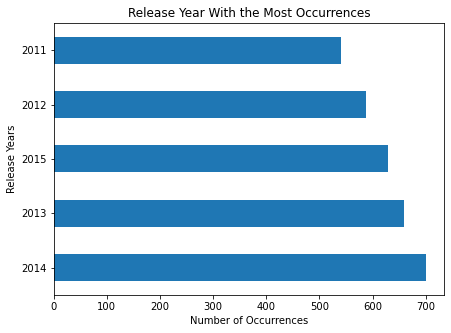

In [49]:
top_years().plot(kind='barh', figsize=(7,5), title='Release Year With the Most Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Release Years')
plt.show()

### What genre of movie has the longest runtime?

According to this research question, we want to see the genres of the movies that has the longest run
time.

In [16]:
run_df = df[['genres','runtime']]

In [181]:
#recalibreate the index
run_df.set_index('genres',inplace=True)

In [195]:
run_df.shape

(10866, 1)

In [182]:
run_df.head(5)

,runtime
genres,
Action|Adventure|Science Fiction|Thriller,124
Action|Adventure|Science Fiction|Thriller,120
Adventure|Science Fiction|Thriller,119
Action|Adventure|Science Fiction|Fantasy,136
Action|Crime|Thriller,137


In [194]:
run_df.isnull().sum()

runtime    0
dtype: int64

In [19]:
run_df.describe()

,runtime
count,10866.000000
mean,102.070863
std,31.381405
min,0.000000
25%,90.000000
50%,99.000000
75%,111.000000
max,900.000000


Even after checking for the properties of runtime, we could not ascertain the values of the genres with the longest runtime, we had to make use of analytical thinking to determine the top genres with the longest runtime. 

In [191]:
run_df[run_df.iloc[:,0]>500]

,runtime
genres,
War|Drama|Action|Adventure|History,540
Action|Drama|War,705
History|Drama,501
Documentary,900
Science Fiction,877
Documentary,566
Drama|History|Western,561
Documentary,550


'Documentary'   has the longest runtime of 900mins. Which is 15 hours. That is mindblowing.

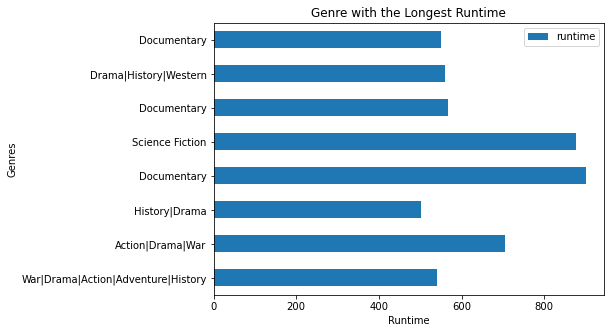

In [330]:
run_df[run_df.iloc[:,0]>500].plot(kind='barh', figsize=(7,5), title="Genre with the Longest Runtime")
plt.xlabel('Runtime')
plt.ylabel('Genres')
plt.show()

### What director has the most movies in the last 10years?

In this research question, would be checking the director that has released the most movies in a 10 years margin, we will consider from the latest release year

We know that the most recent year in the dataset is '2015', we proceed to extract the most recent 10 years into a new dataframe. Which is from '2006' to '2015'

In [99]:
dir_df = df.query('release_year > 2005')

In [100]:
dir_df.tail(10)

,id,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
7815,21943,0.032904,0,0,Ho Voglia Di Te,Luis Prieto,NaN,The film stars Riccardo Scamarcio as a macho t...,106,Romance|Comedy,NaN,3/9/07,38,4.2,2007
7816,13068,0.027512,0,0,Rocket Science,Jeffrey Blitz,independent film,"Hal, a 15-year-old high-school student with a ...",101,Comedy|Drama,HBO Films|W B I Films|Rocket Science Inc.|Duly...,1/19/07,16,6.3,2007
7817,15261,0.020514,0,0,Bring It On: In It To Win It,Steve Rash,competition|cheerleader|sport|cheerleading|che...,Fourth 'Bring It On' movie is set at a cheerle...,90,Comedy,Universal Pictures|Beacon Communications,11/10/07,70,5.6,2007
7818,46169,0.019669,0,0,Twitches Too,Stuart Gillard,witch|sequel|missing father,Reunited witch twins Camryn and Alex adjust to...,83,Drama|Family|Fantasy|TV Movie,Walt Disney Studios Home Entertainment|Disney ...,10/12/07,29,4.9,2007
7819,12901,0.019101,2000000,1431623,No End in Sight,Charles Ferguson,white house|occupying power|independent film|c...,"Chronological look at the fiasco in Iraq, espe...",102,Documentary,NaN,7/27/07,12,6.7,2007
7820,21623,0.017396,0,0,Beneath,Dagen Merrill,montana|buried alive|vision|teenager|blackouts,Christy (Zehetner) returns to her hometown yea...,82,Horror|Mystery|Thriller,MTV Films|Paramount Classics,7/8/07,14,5.0,2007
7821,39561,0.013017,1100000,0,Testosteron,Tomasz Konecki|Andrzej Saramonowicz,male nudity|father-son relationship|alcohol|be...,"The wedding of Kornel, a young, well known TV ...",116,Comedy,Van Worden,3/2/07,10,6.0,2007
7822,36443,0.010471,200000,0,The Union: The Business Behind Getting High,Brett Harvey,NaN,Filmmaker Adam Scorgie explores the illegal ma...,104,Comedy|Documentary,NaN,5/8/07,14,6.8,2007
7823,19934,0.009512,0,0,Ce soir je dors chez toi,Olivier Baroux,NaN,Alex and Laetitia appear to make the perfect c...,84,Comedy,SPAD Films|KL Productions|Alter Films,11/21/07,12,5.3,2007
7824,15651,0.006681,0,312751,For the Bible Tells Me So,Daniel G. Karslake,bible|homosexuality|lesbian|religion,An exploration of the intersection between rel...,98,Documentary,NaN,10/5/07,10,6.1,2007


In this dataframe, we only need the director, original title, and release year column. So we proceed to drop the rest of the columns

In [101]:
dir_df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [103]:
dir_df = dir_df.drop(columns = ['id', 'popularity', 'budget', 'revenue',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average'])

Verify the dropped columns

In [104]:
dir_df.head(3)

,original_title,director,release_year
0,Jurassic World,Colin Trevorrow,2015
1,Mad Max: Fury Road,George Miller,2015
2,Insurgent,Robert Schwentke,2015


Check for missing entries

In [105]:
dir_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 0 to 7824
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  5481 non-null   object
 1   director        5442 non-null   object
 2   release_year    5481 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 171.3+ KB


Now we see that director has 39 missing entries because it is not equal to the total entries. In this case, we remove the rows with the missing entries

In [113]:
dir_df = dir_df.dropna()

We now verify if there are still missing entries

In [114]:
dir_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806 entries, 0 to 7824
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  5806 non-null   object
 1   director        5806 non-null   object
 2   release_year    5806 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 181.4+ KB


In [129]:
dir_df['director'].value_counts()[:5]

Tyler Perry          15
Uwe Boll             15
Steven Soderbergh    12
Woody Allen          11
Roel ReinÃ©           9
Name: director, dtype: int64

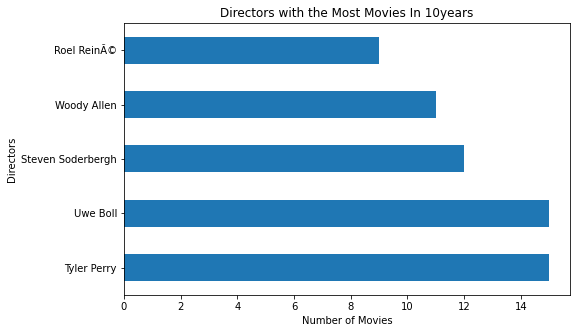

In [329]:
dir_df['director'].value_counts()[:5].plot(kind='barh',figsize=(8,5), title="Directors with the Most Movies In 10years")
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.show()

According to the analysis. We can conclude that there are two directors with the most movies in a 10 year duration.

Tyler Perry = 15 movies

  Uwe Boll = 15 movies

### Which directors have had the most profitable movies in the last 10years?

This research question is based on which producer has made the most profit based on the budget of the movie and the revenue incurred. This research question just like the previous one will focus on the most recent movies.

First off we create a new column with the profit made, by substracting the budget from the revenue

In [243]:
## I would like to remove the scientific notation so that the amounts can show fully when examining the properties.
pd.set_option('display.float_format', lambda x: '%.9f' %x)

In [200]:
df.head(2)

,id,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [201]:
df['profit_made']= (df['revenue'] - df['budget'])

Confirm if the new column is added

In [203]:
df.head(2)

,id,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit_made
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354


Now we filter the columns using a query to get the last 10 years we need for this analysis into a new dataframe.


We will need to drop every other columns after leaving only these columns. ['director', 'original_title', 'release_year', 'profit_made']

In [206]:
profit_df = df.query('release_year > 2005')

In [208]:
## To verify
profit_df.release_year.nunique()

10

In [209]:
### dropping every other column
profit_df = profit_df.drop(columns = ['id', 'popularity','keywords', 'overview', 'runtime', 'genres','budget', 'revenue', 'production_companies',
       'release_date', 'vote_count', 'vote_average'])

In [217]:
## verify drop columns
profit_df.columns

Index(['original_title', 'director', 'release_year', 'profit_made'], dtype='object')

In [218]:
#   types and look for instances of missing or possibly errant data
profit_df.isnull().sum()

original_title     0
director          39
release_year       0
profit_made        0
dtype: int64

We can see that the 'director' column has 39 null rows. That will not be appropriate with our analysis. Therefore, We will drop the null rows in 'director' column.

In [219]:
profit_df = profit_df.dropna()

Lets verify the null columns

In [220]:
profit_df.isnull().sum()

original_title    0
director          0
release_year      0
profit_made       0
dtype: int64

In [222]:
profit_df.head(4)

,original_title,director,release_year,profit_made
0,Jurassic World,Colin Trevorrow,2015,1363528810
1,Mad Max: Fury Road,George Miller,2015,228436354
2,Insurgent,Robert Schwentke,2015,185238201
3,Star Wars: The Force Awakens,J.J. Abrams,2015,1868178225


In [ ]:
#recalibreate the index
profit_df.set_index('director',inplace=True)

In [244]:
profit_df.describe()

,release_year,profit_made
count,5442.000000000,5442.000000000
mean,2010.943954429,25849171.388092615
std,2.831411556,108310193.488097697
min,2006.000000000,-413912431.000000000
25%,2009.000000000,0.000000000
50%,2011.000000000,0.000000000
75%,2013.000000000,1554617.250000000
max,2015.000000000,2544505847.000000000


We can see from the properties that the highest profit is from  

In [331]:
profit_df.sort_values('profit_made', ascending=False).head(10)

,original_title,release_year,profit_made
director,,,
James Cameron,Avatar,2009,2544505847
J.J. Abrams,Star Wars: The Force Awakens,2015,1868178225
Colin Trevorrow,Jurassic World,2015,1363528810
James Wan,Furious 7,2015,1316249360
Joss Whedon,The Avengers,2012,1299557910
David Yates,Harry Potter and the Deathly Hallows: Part 2,2011,1202817822
Joss Whedon,Avengers: Age of Ultron,2015,1125035767
Chris Buck|Jennifer Lee,Frozen,2013,1124219009
Kyle Balda|Pierre Coffin,Minions,2015,1082730962


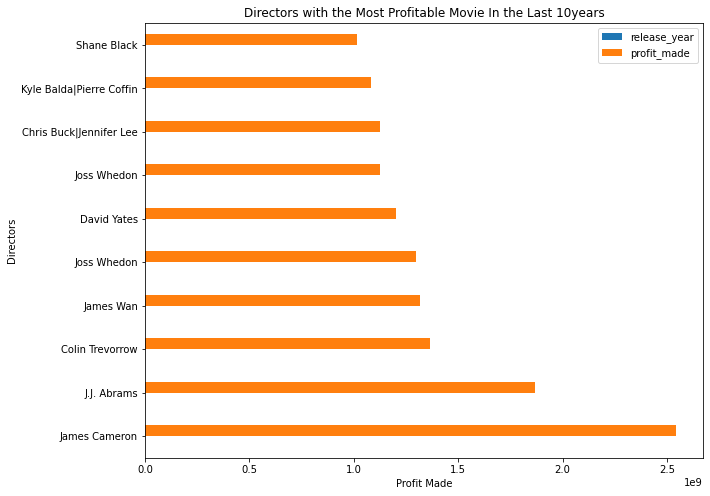

In [326]:
profit_df.sort_values('profit_made', ascending=False).head(10).plot(kind='barh', figsize=(10,8), title="Directors with the Most Profitable Movie In the Last 10years")
plt.xlabel('Profit Made')
plt.ylabel('Directors')
plt.show()

<a id='conclusions'></a>
## Conclusions and Limitation

From the analysis carried out on this dataset, we made some interesting findings based on the research questions we devised. I encountered some difficulty and errors but made use of https://stackoverflow.com for clarifications and code corrections.


1. What year has the most amount of occurrences
This research question was made to determine the years that had the most movie released, or it can also be said to determine that the years that directors just wanted to shine. Anyway you put it, we came up with the top 5 years from the total of 56 years with the most occurrences in this dataset. And all of the years were in the 21st century. Hurray for evolution!

    i. 2014 was the year with the most occurrences, it occurred 700 times.

    ii. Coming in second is 2013 with 659 occurrences.

    iii. Then 2015 with 629 occurrences.

    iv. 2012 with 588 occurrences.

    v. 2011 with 540 occurrences.




2. What genre of movie has the longest runtime?
This question is a very interesting one as we want to figure out, which genre has the longest runtime in the whole 56years of movie production, and the answer that was realized was mind blowing. 

    i. Documentary was the longest, unrealistically long in my opinion. With a runtime of 900 minutes, which is 15hours. 

    ii. Then Science fiction came in really close with a run time of 877 minutes, which is 14hours and 6 minutes.
    
    
    
    

3. Which director has the most movies in the last 10years?
In this question we wanted to determine which producer had more movies in the last 10years, we can say that , the producer that had the most movies is more hardworking. After the analysis, we realized in the last 10 years there was a tie between "Tyle Perr" and "Uwe Boll" with 15 movies each. We can say they were the most hardworking directors.


3. Which directors have had the most profitable movies in the last 10years?
This research question focused on the profit made by directors in the last 10years and the directors that made the most profit. And we undoubtedly concluded from the analysis that;


    i. James Cameron had the highest profitbwith the movie "Avatar" which was released in 2009
    
    ii. J.J Abrahams coming in second with his movie "Star Wars: The Force Awakens" which was released in 2015.
    
## Limitation

Althogh the dataset presented a lot of movies with various columns describing the revenue, budget, directors, runtime and some others. It would have been more fun and insightful if movies of other countries were included in the dataset, or maybe they were included but there was no data signifying that. Then the 'production_country' column would have been included for us to make more accurate conclusions.


